<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab1h/blob/main/HO_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lab1h Harmonic oscillator experiment

In [149]:
!pip install uncertainties

In [150]:
from uncertainties import ufloat
from uncertainties.umath import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.signal import find_peaks, peak_prominences
from scipy.optimize import curve_fit



In [177]:
def get_peaks(t, signal):
  rate = np.mean(np.diff(t))
  min_period = 0.2 #s
  min_prominence = 2e-3 ## 2 mm
  peaks, _ = find_peaks(signal, height=np.max(signal) / 3, prominence=min_prominence,
                        distance=min_period/rate )
  return t[peaks], signal[peaks]

def get_tau(t, x):
  def log_decay(t, A, tau):
    return A - t / 2/tau
  peaks, _ = find_peaks(x, height=np.max(x) / 3)

  tpeaks = t[peaks]
  xpeaks = x[peaks ]
  popt, pcov = curve_fit(log_decay, tpeaks, np.log(xpeaks))
  tau = ufloat(popt[1], np.sqrt(np.diag(pcov))[1])
  return tau

def get_parameters(t, x):
  def sinusoid(t, A, omega, phi):
    return A * np.cos(omega * t + phi)
  tau = get_tau(t, x)
  omega1 = omega0.n
  initials = [np.max(x), omega0.n, 0]
  popt, pcov = curve_fit(sinusoid, t, x, p0=initials)
  errs = np.sqrt(np.diag(pcov))
  A = ufloat(popt[0], errs[0])
  omega1 = ufloat(popt[1], errs[1])
  phi = ufloat(popt[2], errs[2])
  om0 = sqrt(omega1**2 + 1/4/tau**2)
  return omega1, tau



## Expected frequency

$$
\omega_0 = \sqrt\frac{k_1+k_2}{m}
$$



In [185]:
dx = ufloat(97.95e-3, 0.01e-3)
dm1 = ufloat(100.0e-3, 0.1e-3) # g
dm2 = ufloat(0e-3, 0.e-3) # g
g = 9.7939
k1 = dm1 * g / dx
k2 = dm2 * g / dx
print(f'k1 = {k1}, k2 = {k2}')
m = ufloat(212.5e-3, .1e-3)
m_strings = 0* ufloat(28e-3, .1e-3)
omega0 = sqrt((k1 + k2) / (m +  m_strings/6))
print(f'Expected omega0: {omega0} rad/s')

k1 = 9.999+/-0.010, k2 = 0.0+/-0
Expected omega0: 6.860+/-0.004 rad/s


/usr/local/lib/python3.11/dist-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


## Measurements

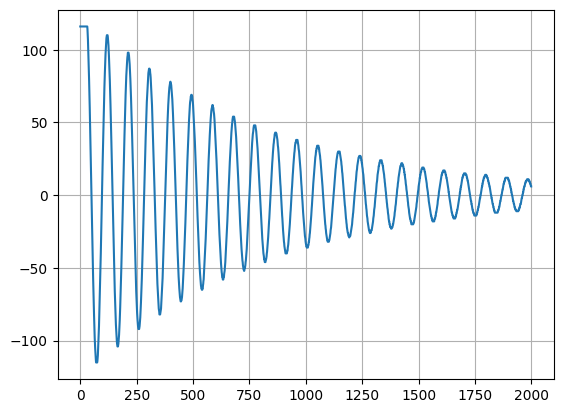

In [189]:
filename = 'rate_100_max_friction.txt'

t_, count = np.genfromtxt(filename, delimiter='\t', usecols=[1,3], unpack=True)
plt.plot(count)
plt.grid()
plt.show()

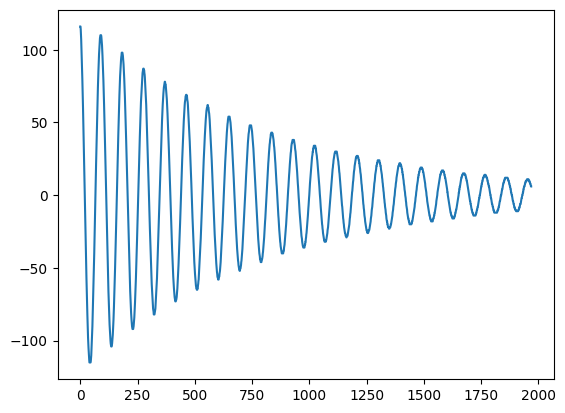

In [190]:
ix0 = 30
ix1 = len(count)
plt.plot(count[ix0:ix1])


### Approximation

In [191]:
t = t_[ix0:ix1]
x = count[ix0:ix1]
x -= np.mean(x)

om1, t1 = get_parameters(t, x)

om0 = sqrt( om1**2 + 1 /4 /t1**2)
Q = om0 * t1

print(f'{filename} omega0 = {om0} rad/s, Q = {Q} om1={om1} rad/s, tau = {t1} s')



rate_100_max_friction.txt omega0 = 6.7393+/-0.0027 rad/s, Q = 26.68+/-0.20 om1=6.7381+/-0.0027 rad/s, tau = 3.959+/-0.030 s
